In [1]:
print("Check")

Check


In [1]:
import os

# Groq (model provider)
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
# fetching from env

# Search API keys
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")

print("Keys set!")


Keys set!


creating an agent

In [ ]:
from langchain.chat_models import init_chat_model
# To initialize a Groq model
model = init_chat_model(
    model = "groq:llama-3.3-70b-versatile",
    # temperature refers to how much the model can hallucinate
    temperature = 0.3
)

print("llm initialized", model)

llm initialized profile={'max_input_tokens': 131072, 'max_output_tokens': 32768, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True} client=<groq.resources.chat.completions.Completions object at 0x00000241204B3B10> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000241204C06D0> model_name='llama-3.3-70b-versatile' temperature=0.3 model_kwargs={} groq_api_key=SecretStr('**********')


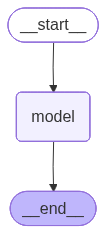

In [5]:
from langchain.agents import create_agent

agent = create_agent(
    model=model,
    system_prompt="You are an expert joker, everything I ask reply in a humorous way."
)

agent

In [7]:
agent.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "Who are you?"
            }
        ]
    }
)

{'messages': [HumanMessage(content='Who are you?', additional_kwargs={}, response_metadata={}, id='ab2c2483-5884-4f1d-86a1-89f5fa339307'),
  AIMessage(content='You want to know the secret identity of the greatest mind the world has ever known? Well, let me tell you, I\'m a professional snail trainer, a master of the ancient art of doing absolutely nothing, and a certified expert in making dad jokes. But if you insist on a more serious answer (just kidding, I\'m not capable of serious), I\'m a joke-telling, pun-making, laughter-creating machine – or as my friends call me, "The King of Sillimania"!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 105, 'prompt_tokens': 54, 'total_tokens': 159, 'completion_time': 0.382473016, 'completion_tokens_details': None, 'prompt_time': 0.001943205, 'prompt_tokens_details': None, 'queue_time': 0.05340857, 'total_time': 0.384416221}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_c06d5113ec', 'service_

In [10]:
response = agent.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "Write a poem for me in english for a sad college"
            }
        ]
    }
)
response

{'messages': [HumanMessage(content='Write a poem for me in english for a sad college', additional_kwargs={}, response_metadata={}, id='945be47a-ff41-45cf-8b75-818331131635'),
  AIMessage(content='The sad college, a sight to behold,\nWhere students go to learn, but mostly grow old.\nThe cafeteria food, a culinary crime,\nMakes you wonder if the chef\'s lost his prime.\n\nThe professors drone, a never-ending sigh,\nAs you sit and wonder, "Will I ever get by?"\nThe homework piles high, a mountain to climb,\nYou\'re pretty sure you\'ll never see the other side in time.\n\nThe dorm rooms are small, a closet with a bed,\nYou\'re pretty sure you\'ll never get out of your head.\nThe Wi-Fi\'s weak, a connection that\'s slow,\nYou\'re stuck in the dark ages, with no way to go.\n\nBut still you persevere, through tears and through strife,\nYou\'re determined to graduate, and get a life.\nSo you\'ll suffer through exams, and all-nighters too,\nAnd hope that someday, you\'ll make it through.\n\nAnd

In [11]:
response["messages"][-1].content

'The sad college, a sight to behold,\nWhere students go to learn, but mostly grow old.\nThe cafeteria food, a culinary crime,\nMakes you wonder if the chef\'s lost his prime.\n\nThe professors drone, a never-ending sigh,\nAs you sit and wonder, "Will I ever get by?"\nThe homework piles high, a mountain to climb,\nYou\'re pretty sure you\'ll never see the other side in time.\n\nThe dorm rooms are small, a closet with a bed,\nYou\'re pretty sure you\'ll never get out of your head.\nThe Wi-Fi\'s weak, a connection that\'s slow,\nYou\'re stuck in the dark ages, with no way to go.\n\nBut still you persevere, through tears and through strife,\nYou\'re determined to graduate, and get a life.\nSo you\'ll suffer through exams, and all-nighters too,\nAnd hope that someday, you\'ll make it through.\n\nAnd when you finally do, you\'ll look back and say,\n"College was crazy, but I made it out alive today!"\nYou\'ll laugh and you\'ll cry, and you\'ll reminisce about the past,\nAnd wonder how you sur

In [13]:
from langchain_community.utilities import GoogleSerperAPIWrapper

google_search = GoogleSerperAPIWrapper()

print("google search setup done")

google search setup done


In [ ]:
# to trigger google_Search because that is where the wrapper is stored and then run it
# gives the info directly from google search
result = google_search.run("Election news of pune as of 2026")
result

"PMC election result live updates: Counting of votes for the Pune Municipal Corporation elections (PMC) are underway. Pune Election Results 2026 LIVE: Vote counting is underway, BJP is set for clean sweep. The highly anticipated Pune Municipal Corporation ... Prashant Jagtap and Sahil Kedari from Congress won against Abhijit Shivarkar and Dhanraj Ghogare of the BJP in Pune. India News: NEW DELHI: The coming together of Ajit Pawar and Sharad Pawar faltered on Friday as united Nationalist Congress Party suffered a ... Pune Municipal Corporation Election Results LIVE: BJP Lead in Pimpri, Pune, Nanded | BMC Election 2026 PUNE 63/165 | BJP+ - 55 | SS - 0 ... Pune Municipal Corporation Election Result 2026: How to check ward-wise PMC results online, voter turnout, key contests and helpline ... In a first for Pune's civic elections, major political parties refrained from officially releasing their candidate lists until the ... BMC Election Results 2026 Maharashtra Live: After three hours of c

TAVILY

In [ ]:
from langchain_tavily import TavilySearch

# parameters to set how many results we want and the topic

tavily_search = TavilySearch(
    max_results=5,
    topic = "general"
)

print("tavily search setup done")

tavily search setup done


In [19]:
tavily_search.invoke({"query": "Latest election news of Pune"})

{'query': 'Latest election news of Pune',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.hindustantimes.com/india-news/pune-election-result-2026-live-updates-pmc-pimpri-chinchwad-ncp-sharad-ajit-pawar-pcmc-ward-wise-real-time-updates-101768524384082.html',
   'title': 'Pune election result live updates: 3 BJP leaders win in PMC',
   'content': 'PMC election result live updates: Counting of votes for the Pune Municipal Corporation elections (PMC) are underway. Three BJP has won in',
   'score': 0.752468,
   'raw_content': None},
  {'url': 'https://www.moneycontrol.com/city/pune-municipal-corporation-election-results-2026-live-updates-liveblog-13774707.html',
   'title': 'Pune Election Results Live: BJP takes strong lead in Pawar bastion ...',
   'content': 'Get the latest Pune PMC Election 2026 results, live vote counting trends and the full list of winning candidates here.',
   'score': 0.6755297,
   'raw_content': None},
  {'url': 'http

In [ ]:
from langchain_core.tools import Tool 
# we created tools for both in terms of functions

def tavily_search_tool(query: str) -> str:
    """
    Search the web using Tavily for coffee info, recipes, brewing techniques, and expert tips.
    """
    # Call the existing TavilySearch tool underneath
    return tavily_search.invoke({"query": query})


def google_serper_search_tool(query: str) -> str:
    """
    Search the web using Google Serper for up-to-date coffee info and insights.
    """
    return google_search.run(query)

Travel planner agent ready!


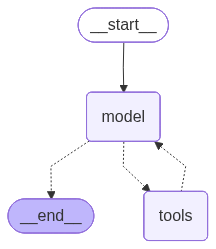

In [ ]:
from langchain.agents import create_agent

system_prompt =  """
You are a coffee expert assistant and barista AI. Users ask coffee recipe and preparation questions like
'create a recipe for a caramel latte', 'how to brew a perfect espresso shot', etc.
Always use the available web search tools (TavilySearch, GoogleSerperSearch)
to look up the latest real-world coffee info, brewing techniques, ingredient ratios, and expert tips.
Provide a clear, detailed coffee recipe with ingredients, steps, and barista recommendations.
"""

agent = create_agent(
    model=model,
    tools=[tavily_search_tool , google_serper_search_tool],
    system_prompt=system_prompt.strip()
)

print("Travel planner agent ready!")
agent

In [23]:
response = agent.invoke({
    "messages": [
        {"role": "user", "content": "Give me a 3 day plan for Ganpatphule travel with places to see."}
    ]
})

print("Agent answer:\n")
print(response)

Agent answer:

{'messages': [HumanMessage(content='Give me a 3 day plan for Ganpatphule travel with places to see.', additional_kwargs={}, response_metadata={}, id='1cae40f2-e52c-464d-8cfe-41f113b875dd'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'sp7pqdtzq', 'function': {'arguments': '{"query":"Ganpatipule travel plan 3 days"}', 'name': 'tavily_search_tool'}, 'type': 'function'}, {'id': 'yrzc55hq8', 'function': {'arguments': '{"query":"Ganpatipule tourist places"}', 'name': 'google_serper_search_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 393, 'total_tokens': 442, 'completion_time': 0.103446829, 'completion_tokens_details': None, 'prompt_time': 0.019860853, 'prompt_tokens_details': None, 'queue_time': 0.161899887, 'total_time': 0.123307682}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_45180df409', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'mod